<a href="https://colab.research.google.com/github/abhashpanwar/Modelling-In-Operations-Management/blob/master/OM_Pro1_(File_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive

/content/gdrive


In [3]:
#!ls "/content/gdrive/My Drive/modelling-project-research-papers/rossmann-store-sales/"

## Import Libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

## Load Data Set

In [5]:
rossmann_dataset_path= '/content/gdrive/My Drive/modelling-project-research-papers/rossmann-store-sales/'
rossmann_train='train.csv'
rossmann_test='test.csv'
rossmann_sample='sample_submission.csv'
rossmann_store='store.csv'

In [6]:
#training 
df_train=pd.read_csv(rossmann_dataset_path+rossmann_train,low_memory=False)
print(df_train.shape)
print(df_train.head())

(1017209, 9)
   Store  DayOfWeek        Date  Sales  ...  Open  Promo  StateHoliday SchoolHoliday
0      1          5  2015-07-31   5263  ...     1      1             0             1
1      2          5  2015-07-31   6064  ...     1      1             0             1
2      3          5  2015-07-31   8314  ...     1      1             0             1
3      4          5  2015-07-31  13995  ...     1      1             0             1
4      5          5  2015-07-31   4822  ...     1      1             0             1

[5 rows x 9 columns]


In [7]:
#testing
df_test=pd.read_csv(rossmann_dataset_path+rossmann_test,low_memory=False)
print(df_test.shape)
print(df_train.head())

(41088, 8)
   Store  DayOfWeek        Date  Sales  ...  Open  Promo  StateHoliday SchoolHoliday
0      1          5  2015-07-31   5263  ...     1      1             0             1
1      2          5  2015-07-31   6064  ...     1      1             0             1
2      3          5  2015-07-31   8314  ...     1      1             0             1
3      4          5  2015-07-31  13995  ...     1      1             0             1
4      5          5  2015-07-31   4822  ...     1      1             0             1

[5 rows x 9 columns]


In [8]:
"""#testing
df_test=pd.read_csv(rossmann_dataset_path+rossmann_test,low_memory=False)
print(df_test.shape)
print((df_test.isna().sum()/len(df_test))*100)
#putting 0 inplace where the value is missing
dff=df_test[['Open']]
dff=dff.fillna('0')
#dff.shape""";

In [9]:
#store dataset
df_store=pd.read_csv(rossmann_dataset_path+rossmann_store,low_memory=False)
#df=df_store.copy()
print(df_store.shape)
print(df_store.head())
#print((df_store.isnull().sum()/len(df_store))*100) 

(1115, 10)
   Store StoreType  ... Promo2SinceYear    PromoInterval
0      1         c  ...             NaN              NaN
1      2         a  ...          2010.0  Jan,Apr,Jul,Oct
2      3         a  ...          2011.0  Jan,Apr,Jul,Oct
3      4         c  ...             NaN              NaN
4      5         a  ...             NaN              NaN

[5 rows x 10 columns]


# Handling Missing Values 

### Check Missing Values

In [10]:
print(df_train.shape)
pd.DataFrame(data={'no. of missing values':df_train.isnull().sum(),'%':round((df_train.isnull().sum()/len(df_train))*100,4)})

(1017209, 9)


,no. of missing values,%
Store,0,0.0
DayOfWeek,0,0.0
Date,0,0.0
Sales,0,0.0
Customers,0,0.0
Open,0,0.0
Promo,0,0.0
StateHoliday,0,0.0
SchoolHoliday,0,0.0


In [11]:
print(df_test.shape)
pd.DataFrame(data={'no. of missing values':df_test.isnull().sum(),'%':round((df_test.isnull().sum()/len(df_test))*100,4)})

(41088, 8)


,no. of missing values,%
Id,0,0.0000
Store,0,0.0000
DayOfWeek,0,0.0000
Date,0,0.0000
Open,11,0.0268
Promo,0,0.0000
StateHoliday,0,0.0000
SchoolHoliday,0,0.0000


In [12]:
print(df_store.shape)
pd.DataFrame(data={'no. of missing values':df_store.isnull().sum(),'%':round((df_store.isnull().sum()/len(df_store))*100,4)})

(1115, 10)


,no. of missing values,%
Store,0,0.0000
StoreType,0,0.0000
Assortment,0,0.0000
CompetitionDistance,3,0.2691
CompetitionOpenSinceMonth,354,31.7489
CompetitionOpenSinceYear,354,31.7489
Promo2,0,0.0000
Promo2SinceWeek,544,48.7892
Promo2SinceYear,544,48.7892
PromoInterval,544,48.7892


### Filling

### 1) Test data:
Since There are less no. of rows that have nan values we acan drop them

In [13]:
df_test=df_test.dropna()

### 2) Store Data

In [14]:
df=df_store.copy()

#### 2.1) Filling up 'Promo2SinceWeek','Promo2SinceYear','PromoInterval' columns

In [15]:
col3=['Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
df3=df[col3]
print(df3.isnull().sum())

Promo2               0
Promo2SinceWeek    544
Promo2SinceYear    544
PromoInterval      544
dtype: int64


In [16]:
print(df3[df3.Promo2==0].isnull().sum())

Promo2               0
Promo2SinceWeek    544
Promo2SinceYear    544
PromoInterval      544
dtype: int64


In [17]:
print(df3[df3.Promo2==1].isnull().sum())

Promo2             0
Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64


In [18]:
print(df3[df3.Promo2==0].head())

   Promo2  Promo2SinceWeek  Promo2SinceYear PromoInterval
0       0              NaN              NaN           NaN
3       0              NaN              NaN           NaN
4       0              NaN              NaN           NaN
5       0              NaN              NaN           NaN
6       0              NaN              NaN           NaN


In [19]:
df3=df3[df3.Promo2==0]
df3.fillna('0',inplace=True)

In [20]:
#df[df.Promo2==0][col3]=df[df.Promo2==0][col3].fillna('0',inplace=True)

In [21]:
for ind in df3.index:
  df.loc[ind,col3[1:]]=0

In [22]:
print(df.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64


#### 2.2)filling up the 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','CompetitionDistance' column using mean and mediam

##### 2.2.1)filling up the 'CompetitionOpenSinceMonth'

In [24]:
col1=['CompetitionDistance']

In [25]:
#1) filling up the missing in 'CompetitionDistance' column
df1=df[col1] # 3 null values
print(df1.isnull().sum())

CompetitionDistance    3
dtype: int64


In [26]:
imp_mean = SimpleImputer( strategy='mean') 
imp_mean.fit(df1)
imputed_data = imp_mean.transform(df1)
print(imputed_data)

[[ 1270.]
 [  570.]
 [14130.]
 ...
 [ 9260.]
 [  870.]
 [ 5350.]]


In [27]:
#updating the dataset
imputed_data=pd.DataFrame(data=imputed_data,columns=col1)
df1[col1]=imputed_data[col1]

#updating original df after filling values
#df[col1]=df1[col1]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
#'CompetitionDistance' filled  
print(df1.isnull().sum())

CompetitionDistance    0
dtype: int64


##### 2.2.2) Filling up 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear' *column*

In [29]:
col2=['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
df2=df[col2]
df2.isnull().sum()

CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
dtype: int64

In [30]:
imp_median = SimpleImputer( strategy='median') 
imp_median.fit(df2)
imputed_data = imp_median.transform(df2)

In [31]:
#updating the dataset
imputed_data=pd.DataFrame(data=imputed_data,columns=col2)
df2[col2]=imputed_data[col2]

#updating original df after filling values
#df[col2]=df1[col2]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


#### 2.3)filling up the 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','CompetitionDistance' column using Imputer

In [32]:
df_temp=df.copy()
df_temp[col1]=df1[col1]
df_temp[col2]=df2[col2]
df_temp.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [33]:
#merging data for imputer 
df_train_store=pd.merge(df_train, df, how = 'inner', on = 'Store')

#rearranging columns
new_indices=['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval','Sales']
df_train_store=df_train_store[new_indices]

#droping categorical/object columns
df_train_store.drop(['Date','StoreType','Assortment','PromoInterval','StateHoliday'],axis=1,inplace=True)

df_train_store.head()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Sales
0,1,5,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,5263
1,1,4,546,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,5020
2,1,3,523,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,4782
3,1,2,560,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,5011
4,1,1,612,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,6102


In [34]:
X=df_train_store.iloc[:,:-1]
y=df_train_store.iloc[:,-1]
impute_estimator = BayesianRidge()
br_estimator = BayesianRidge()
N_SPLITS=5
score_iterative_imputer = pd.DataFrame()

estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator
    )
score_iterative_imputer[impute_estimator.__class__.__name__] = \
    cross_val_score(
        estimator, X, y, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

#### 2.4)Comapring Filling Method

In [35]:
#merging data i.e filled by mean & median

df_train_store=pd.merge(df_train, df_temp, how = 'inner', on = 'Store')
new_indices=['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval','Sales']
df_train_store=df_train_store[new_indices]
df_train_store.drop(['Date','StoreType','Assortment','PromoInterval','StateHoliday'],axis=1,inplace=True)

df_train_store.head()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Sales
0,1,5,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,5263
1,1,4,546,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,5020
2,1,3,523,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,4782
3,1,2,560,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,5011
4,1,1,612,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,6102


In [36]:
X=df_train_store.iloc[:,:-1]
y=df_train_store.iloc[:,-1]
score_iterative_imputer['mean_mediam'] = cross_val_score(
        estimator, X, y, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

In [37]:
score_iterative_imputer

,BayesianRidge,mean_mediam
0,-1.575878e+06,-1.573655e+06
1,-2.164219e+06,-2.163217e+06
2,-1.907552e+06,-1.909207e+06
3,-3.053574e+06,-3.052719e+06
4,-2.052256e+06,-2.055388e+06


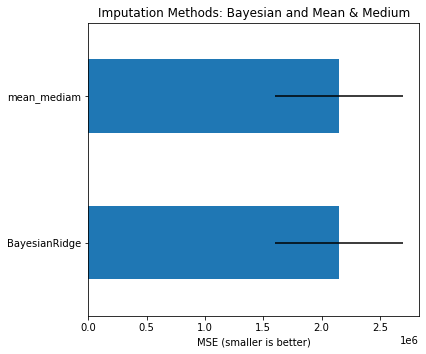

In [38]:
#plotting results
scores=score_iterative_imputer
fig, ax = plt.subplots(figsize=(6, 5))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('Imputation Methods: Bayesian and Mean & Medium')
ax.set_xlabel('MSE (smaller is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels(score_iterative_imputer.columns)
plt.tight_layout(pad=1)
plt.show()

1)
CompetitionDistance as mean
CompetitionOpenSinceMonth as median
CompetitionOpenSinceYear as median

2)
CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear as Itertive imputer 

3)Promo2SinceWeek,Promo2SinceYear, PromoInterval = 0 when Promo2==0